In [66]:
filename = '500-gpt-3.5-turbo-text-embedding-3-large'
experiment = '-p1'
GROLTS_LABELS = True

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

path = './data_out/'

# Single Eval

Summed Acc:  11.399420593625273


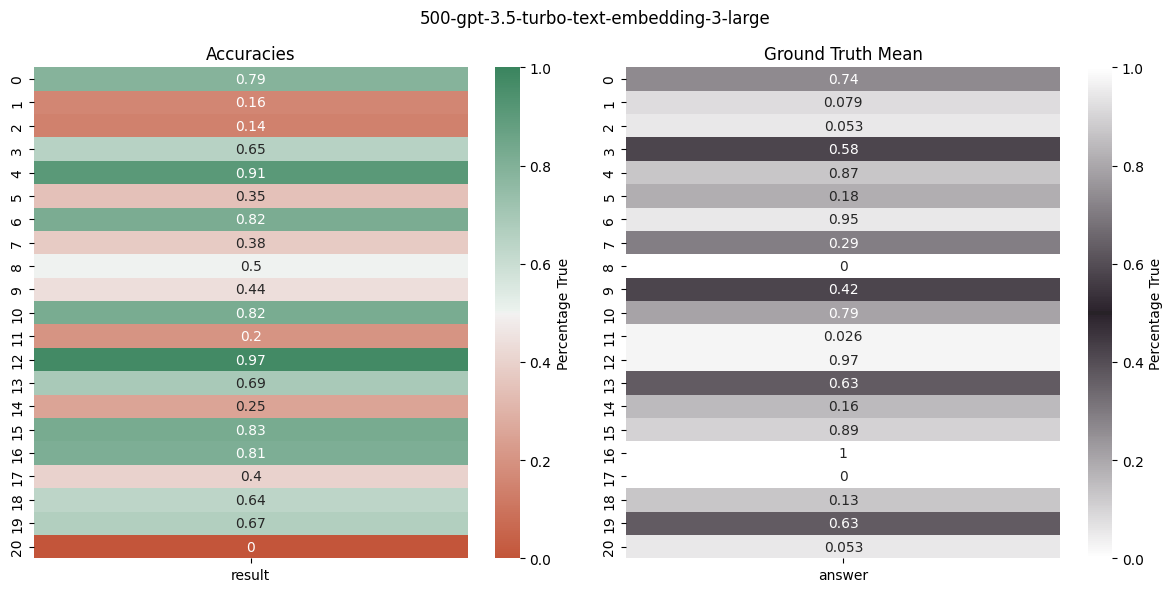

In [70]:
# Read the data
df = pd.read_csv(path + filename + experiment + '.csv')
df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';', dtype=int)
df_labels = df_labels.melt(id_vars=['paper_id'], var_name='question_id', value_name='answer')
df_labels['paper_id'] = df_labels['paper_id'].astype(int)
df_labels['question_id'] = df_labels['question_id'].astype(int)
df_labels['answer'] = df_labels['answer'].astype(int)

# Replace 'YES'/'NO' answers with 1/0 in both DataFrames
df.replace(('YES', 'Yes', 'yes', 'NO', 'No', 'no'), (1, 1, 1, 0, 0, 0), inplace=True)

# Merge the prediction and label DataFrames on 'paper_id' and 'question_id'
df_merged = df.merge(df_labels, on=['paper_id', 'question_id'], suffixes=('_pred', '_true'))

# Add a 'result' column indicating whether the prediction matches the true label
df_merged['result'] = np.where(
    df_merged['answer_pred'].isin([0, 1]),
    df_merged['answer_pred'] == df_merged['answer_true'],
    np.nan
)
df_merged.dropna(inplace=True)

# Group by 'question_id' to calculate the mean accuracy per question
percent_true_by_question = df_merged.groupby('question_id')['result'].mean().reset_index()

# Print the summed accuracy
print('Summed Acc: ', percent_true_by_question['result'].sum())

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for predicted results
g1 = sns.heatmap(
    percent_true_by_question.set_index('question_id'),
    annot=True,
    cmap=sns.diverging_palette(20, 145, as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax1
)
g1.set_title('Accuracies')
g1.set_xlabel('')
g1.set_ylabel('')

percent_true_by_question_lab = df_labels.groupby('question_id')['answer'].mean().reset_index()
percent_true_by_question_lab = percent_true_by_question_lab.reindex(percent_true_by_question.index)

# Heatmap for ground truth results
g2 = sns.heatmap(
    percent_true_by_question_lab.set_index('question_id'),
    annot=True,
    cmap=sns.diverging_palette(0, 0, l=100, center="dark", as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax2
)
g2.set_title('Ground Truth Mean')
g2.set_xlabel('')
g2.set_ylabel('')

# Final plot adjustments
fig.suptitle(filename)
fig.tight_layout()
plt.show()

# Prompt Comparison

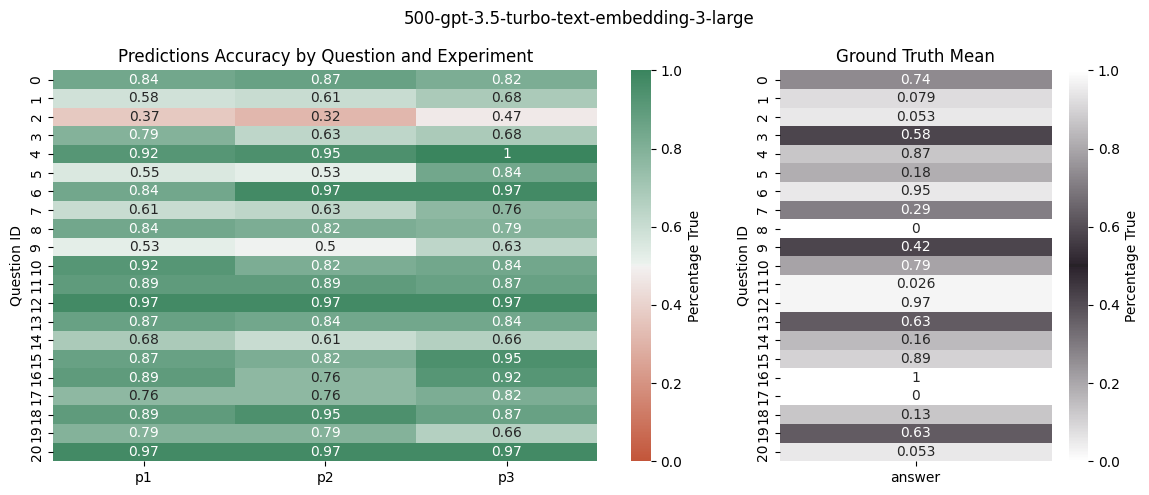

In [ ]:
df1 = pd.read_csv(path + filename + '-p1.csv')
df1['experiment'] = 'p1'
df2 = pd.read_csv(path + filename + '-p2.csv')
df2['experiment'] = 'p2'
df3 = pd.read_csv(path + filename + '-p3.csv')
df3['experiment'] = 'p3'

# Combine the data
df = pd.concat([df1, df2, df3])

# Replace categorical 'YES'/'NO' with numeric 1/0
df.replace(('YES', 'Yes', 'yes', 'NO', 'No', 'no'), (1, 1, 1, 0, 0, 0), inplace=True)

# Load human labels
df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';', dtype=int)
df_labels = df_labels.melt(id_vars=['paper_id'], var_name='question_id', value_name='answer')
df_labels['paper_id'] = df_labels['paper_id'].astype(int)
df_labels['question_id'] = df_labels['question_id'].astype(int)
df_labels['answer'] = df_labels['answer'].astype(int)

## Melt predictions DataFrame for easier comparison
#df_melted = df.melt(id_vars=['paper_id', 'experiment'], var_name='question_id', value_name='answer_pred')
#df_melted['question_id'] = df_melted['question_id'].astype(int)

# Merge predictions with true labels
df_merged = df.merge(df_labels, on=['paper_id', 'question_id'], suffixes=('_pred', '_true'))

# Add a 'result' column indicating whether the prediction matches the true label
df_merged['result'] = np.where(
    df_merged['answer_pred'].isin([0, 1]),
    df_merged['answer_pred'] == df_merged['answer_true'],
    np.nan
)
df_merged.dropna(inplace=True)

# Calculate accuracy by question and experiment
accuracy_by_question_exp = df_merged.groupby(['question_id', 'experiment'])['result'].mean().reset_index()

# Plotting section
fig = plt.figure(figsize=(11.69, 5))
gs = GridSpec(1, 2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Heatmap for predictions accuracy by question and experiment
pivot_accuracy = accuracy_by_question_exp.pivot(index='question_id', columns='experiment', values='result')
sns.heatmap(
    pivot_accuracy,
    annot=True,
    cmap=sns.diverging_palette(20, 145, as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1,
    ax=ax1
)
ax1.set_title('Predictions Accuracy by Question and Experiment')
ax1.set_xlabel('')
ax1.set_ylabel('Question ID')

# Prepare the true labels data for comparison
percent_true_by_question_lab = df_labels.groupby('question_id')['answer'].mean().reset_index()

# Heatmap for ground truth mean accuracy by question
sns.heatmap(
    percent_true_by_question_lab.set_index('question_id'),
    annot=True,
    cmap=sns.diverging_palette(0, 0, l=100, center="dark", as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1,
    ax=ax2
)
ax2.set_title('Ground Truth Mean')
ax2.set_xlabel('')
ax2.set_ylabel('Question ID')

# Final title and layout adjustment
fig.suptitle(filename)
fig.tight_layout()
plt.savefig('../viz/' + filename + '.pdf', bbox_inches='tight')
plt.show()


,paper_id,question_id,reasoning,evidence,answer_pred,experiment,answer_true
2,0,2,The context mentions that MPlus employs a robu...,"- ""Mplus employs a robust full information ma...",1,p1,0
800,0,2,The context mentions that MPlus employs a robu...,"- ""Mplus employs a robust full information ma...",1,p2,0
1598,0,2,The context mentions that Mplus employs a robu...,"- ""Mplus employs a robust full information ma...",1,p3,0


In [72]:
df_melted = df.melt(id_vars=['paper_id', 'experiment'], var_name='question_id', value_name='answer_pred')

,paper_id,experiment,question_id,answer_pred
0,0,p1,question_id,0
1,0,p1,question_id,1
2,0,p1,question_id,2
3,0,p1,question_id,3
4,0,p1,question_id,4
...,...,...,...,...
9571,37,p3,answer,UNSURE
9572,37,p3,answer,0
9573,37,p3,answer,UNSURE
9574,37,p3,answer,1


In [11]:
filename = 'figs500-gpt-3.5-turbo-text-embedding-3-large'
experiment = '-p2'

Summed Acc:  14.000000000000002


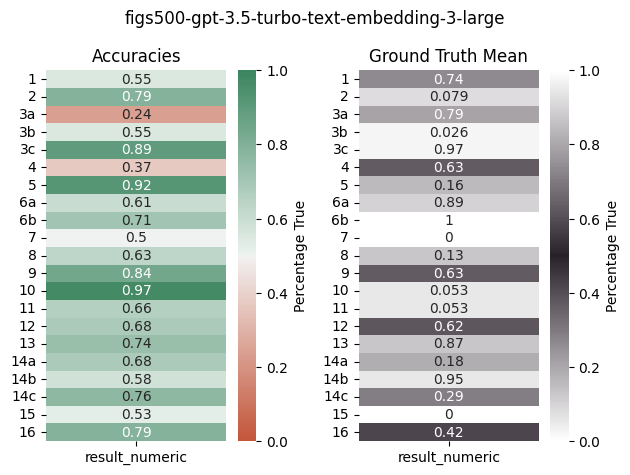

In [13]:
df = pd.read_csv(path + filename + experiment + '.csv')

df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';')

df.replace(('YES', 'Yes', 'yes', 'NO', 'No', 'no'), (1, 1, 1, 0, 0, 0), inplace=True)

res = {}
for i in range(38):
    pred = df[df['paper_id'] == i]
    true = df_labels[df_labels['paper_id'] == i]
    
    paper_res = {}
    for col in pred:
        if col != 'paper_id':
            paper_res[col] = pred[col].values[0] == true[col].values[0]
                
    res[i] = paper_res

df_res = pd.DataFrame.from_dict(res, orient='index')

fig, (ax1, ax2) = plt.subplots(1, 2)

df_res = df_res.reset_index().rename(columns={"index":"paper_id"})	
df_test = df_res.melt(id_vars=['paper_id'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'], var_name='question', value_name='result')

#df_test.dropna(inplace=True)

# Convert the 'question' column to integer for proper sorting
df_test['question'] = df_test['question'].astype(int)

df_test['result_numeric'] = df_test['result'].astype(int)

percent_true_by_question = df_test.groupby('question')['result_numeric'].mean().reset_index()
#percent_true_by_question = percent_true_by_question.sort_values(by='result_numeric', ascending=False)
print('Summed Acc: ', percent_true_by_question.sum()['result_numeric'])
g = sns.heatmap(
    percent_true_by_question.set_index('question'),
    annot=True, 
    cmap=sns.diverging_palette(20, 145, as_cmap=True), 
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax1
)
g.set_title('Accuracies')
g.set_xlabel('')
g.set_ylabel('')
if GROLTS_LABELS:
    g.set_yticklabels(['1', '2', '3a', '3b', '3c', '4', '5', '6a', '6b', '7', '8', '9', '10', '11', '12', '13', '14a', '14b', '14c', '15', '16'])  # Sort y-ticks numerically

df_lab = df_labels.melt(id_vars=['paper_id'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'], var_name='question', value_name='result')

df_lab['result_numeric'] = df_lab['result']

percent_true_by_question_lab = df_lab.groupby('question')['result_numeric'].mean().reset_index()
percent_true_by_question_lab = percent_true_by_question_lab.reindex(percent_true_by_question.index)

g = sns.heatmap(
    percent_true_by_question_lab.set_index('question'),
    annot=True,
    cmap=sns.diverging_palette(0, 0, l=100, center="dark", as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax2
)
g.set_title('Ground Truth Mean')
g.set_xlabel('')
g.set_ylabel('')
if GROLTS_LABELS:
    g.set_yticklabels(['1', '2', '3a', '3b', '3c', '4', '5', '6a', '6b', '7', '8', '9', '10', '11', '12', '13', '14a', '14b', '14c', '15', '16'])  # Sort y-ticks numerically

fig.suptitle(filename)
fig.tight_layout()